<a href="https://colab.research.google.com/github/CodesByVishal/Bike-Sharing-Prediction/blob/main/Sheol_bike_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project - Bike Sharing Demand Prediction**




  ##### **Contribution**    - Individual
  ##### **Name-    Vishal Kumar Singh**



## Project Summary -
## Problem Objective
The introduction of rental bikes in urban cities has significantly enhanced mobility and comfort for residents and visitors alike. The availability and accessibility of these rental bikes are critical factors in reducing waiting times and providing a stable supply of bikes to meet the growing demand. To address this concern effectively, various strategies and technologies can be employed.

Demand forecasting plays a pivotal role in predicting the need for rental bikes at different times and locations. Historical rental data and external factors like weather and events are used to forecast demand accurately. Time series forecasting techniques help in predicting future demand patterns.

Optimal bike placement is another vital aspect of ensuring a stable supply of rental bikes. By employing optimization algorithms, the optimal locations for bike stations can be determined based on predicted demand. This ensures that bikes are available precisely where and when they are needed most.

Inventory management strategies help in redistributing bikes between stations dynamically. If one station consistently runs low on bikes, the system automatically transfers bikes from stations with surpluses to meet the demand. Real-time monitoring, through IoT sensors, allows for the continuous assessment of bike availability and station status.

Dynamic pricing strategies incentivize users to return bikes to stations with high demand during peak hours, helping to balance the bike distribution. User-friendly mobile apps provide real-time information on bike availability and station locations, enhancing user experience.

Machine learning algorithms can improve demand prediction accuracy, and a feedback loop ensures continuous system optimization based on user behavior and performance data. Regular maintenance and quality assurance processes are crucial to keep bikes and stations in good working condition.

As the bike-sharing system expands, scaling the infrastructure and expanding into new areas may be necessary to meet the increasing demand. Monitoring the environmental impact of the system, including reduced traffic congestion and lower carbon emissions, contributes to sustainability efforts.

## Problem Statement
**Develop a predictive model to estimate hourly bike demand, optimizing the supply of rental bikes in urban areas, reducing waiting times, and enhancing user satisfaction.**

## Let's Begin !
## 1. Know Your Data
**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor



## Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = r"/content/drive/MyDrive/seol bike/SeoulBikeData.csv"

In [ ]:
df = pd.read_csv(data_path, encoding = "unicode_escape")

In [ ]:
df.shape

(8760, 14)

## Dataset First View

In [ ]:
df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
3040  06/04/2018                585    16              6.6           50   
3745  06/05/2018                181     1             18.2           71   
4800  19/06/2018               1055     0             21.5           63   
722   31/12/2017                 65     2              0.4           95   
6698  06/09/2018                531     2             21.6           86   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
3040               4.0               645                       -3.1   
3745               1.6              1328                       12.8   
4800               1.0              1740                       14.1   
722                1.7               110                       -0.3   
6698               0.2              1353                       19.1   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
3040                     0.81           0.0            0.0  Spring   
3745                     0.00           0.0            0.0  Spring   
4800                     0.00           0.0            0.0  Summer   
722                      0.00           0.0            1.2  Winter   
6698                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  
3040  No Holiday             Yes  
3745  No Holiday             Yes  
4800  No Holiday             Yes  
722      Holiday             Yes  
6698  No Holiday             Yes

## Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#describing Statical Data
df.describe(include ='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [ ]:
# Checking Null Value
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Visualizing the missing value

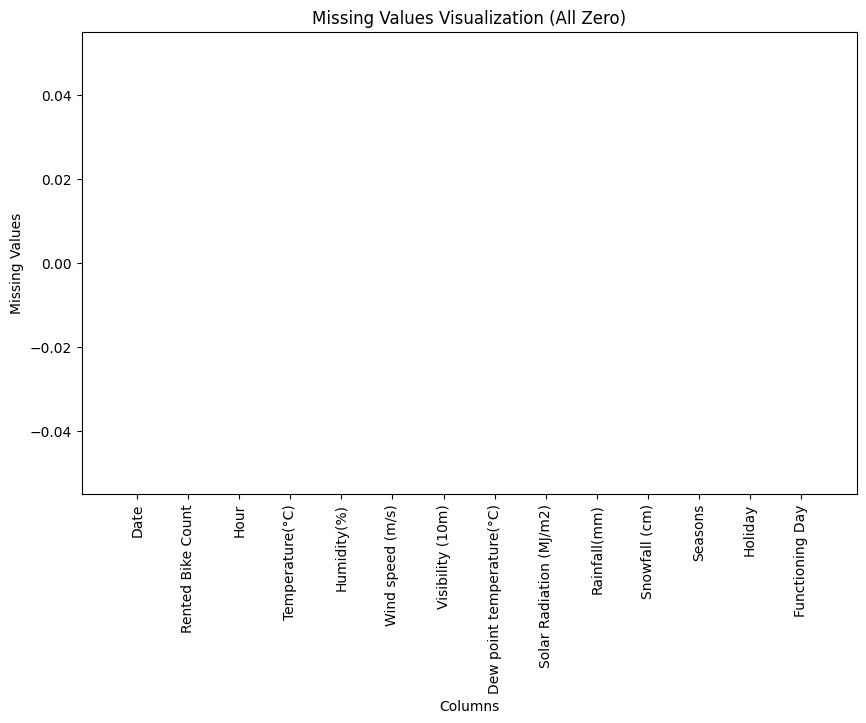

In [ ]:
columns = ["Date", "Rented Bike Count", "Hour", "Temperature(°C)", "Humidity(%)",
           "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)",
           "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", "Seasons",
           "Holiday", "Functioning Day"]
missing_values = [0] * len(columns)
plt.figure(figsize=(10, 6))
plt.bar(columns, missing_values, color='green')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values Visualization (All Zero)')
plt.xticks(rotation=90)
plt.show()



*Since there are no missing values (all zeros),hence the bar chart with bars all at the zero level, indicating that there are no missing values in any of the columns.*

## Insites about the above plot

**Since there are no missing values (all zeros),hence the bar chart with bars all at the zero level, indicating that there are no missing values in any of the columns. Also there are no duplicates in the seoul dataset.**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

## 3. Data Wrangling
Data Wrangling Code

In [ ]:
# Splitting Date column into day, month and year
df['Weekday'] = df['Date'].dt.day_name()
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop('Date', axis =1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekday                    8760 non-null   objec

##  Understanding Your Variables

In [ ]:
# Dataset Columns
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Weekday', 'Day', 'Month', 'Year'],
      dtype='object')

## Variables Description
**Date:** There are 8,760 entries with 365 unique dates. The most common date is "01/12/2017" with a frequency of 24 occurrences.

**Rented Bike Count:** This column contains numerical data. The mean value is approximately 704.60, and the standard deviation is approximately 644.99. The minimum value is 0.0, and the maximum value is 3556.0.

**Hour:** This column contains numerical data representing the hour of the day. The mean value is 11.5, and the standard deviation is approximately 6.92. The minimum value is 0.0, and the maximum value is 23.0.

**Temperature(°C):** This column contains numerical data representing temperature in degrees Celsius. The mean temperature is approximately 12.88°C, with a standard deviation of approximately 11.94°C. The minimum temperature is -17.8°C, and the maximum temperature is 39.4°C.

**Humidity(%):** This column contains numerical data representing humidity levels in percentage. The mean humidity is approximately 58.23%, with a standard deviation of approximately 20.36%. The minimum humidity is 0.0%, and the maximum humidity is 98.0%.

**Wind speed (m/s):** This column contains numerical data representing wind speed in meters per second. The mean wind speed is approximately 1.72 m/s, with a standard deviation of approximately 1.04 m/s. The minimum wind speed is 0.0 m/s, and the maximum wind speed is 7.4 m/s.

**Visibility (10m):** This column contains numerical data representing visibility in meters. The mean visibility is approximately 1436.83 meters, with a standard deviation of approximately 608.30 meters. The minimum visibility is 27.0 meters, and the maximum visibility is 2000.0 meters.

**Dew point temperature(°C):** This column contains numerical data representing dew point temperature in degrees Celsius. The mean dew point temperature is approximately 4.07°C, with a standard deviation of approximately 13.06°C. The minimum dew point temperature is -30.6°C, and the maximum dew point temperature is 27.2°C.

**Solar Radiation (MJ/m2):** This column contains numerical data representing solar radiation in megajoules per square meter. The mean solar radiation is approximately 0.57 MJ/m2, with a standard deviation of approximately 0.87 MJ/m2. The minimum solar radiation is 0.0 MJ/m2, and the maximum solar radiation is 3.52 MJ/m2.

**Rainfall(mm):** This column contains numerical data representing rainfall in millimeters. The mean rainfall is approximately 0.15 mm, with a standard deviation of approximately 1.13 mm. The minimum rainfall is 0.0 mm, and the maximum rainfall is 35.0 mm.

**Snowfall (cm):** This column contains numerical data representing snowfall in centimeters. The mean snowfall is approximately 0.075 cm, with a standard deviation of approximately 0.44 cm. The minimum snowfall is 0.0 cm, and the maximum snowfall is 8.8 cm.

**Seasons:** There are 4 unique seasons, with "Spring" being the most common season (appearing 2208 times).

**Holiday:** There are 2 unique values, with "No Holiday" being the most common (appearing 8328 times).

**Functioning Day:** There are 2 unique values, with "Yes" being the most common (appearing 8465 times).

In [ ]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day   Weekday  \
0           0.0            0.0  Winter  No Holiday             Yes  Thursday   
1           0.0            0.0  Winter  No Holiday             Yes  Thursday   
2           0.0            0.0  Winter  No Holiday             Yes  Thursday   
3           0.0            0.0  Winter  No Holiday             Yes  Thursday   
4           0.0            0.0  Winter  No Holiday             Yes  Thursday   

   Day  Month  Year  
0   12      1  2017  
1   12      1  2017  
2   12      1  2017  
3   12      1  2017  
4   12      1  2017

## EDA

## 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

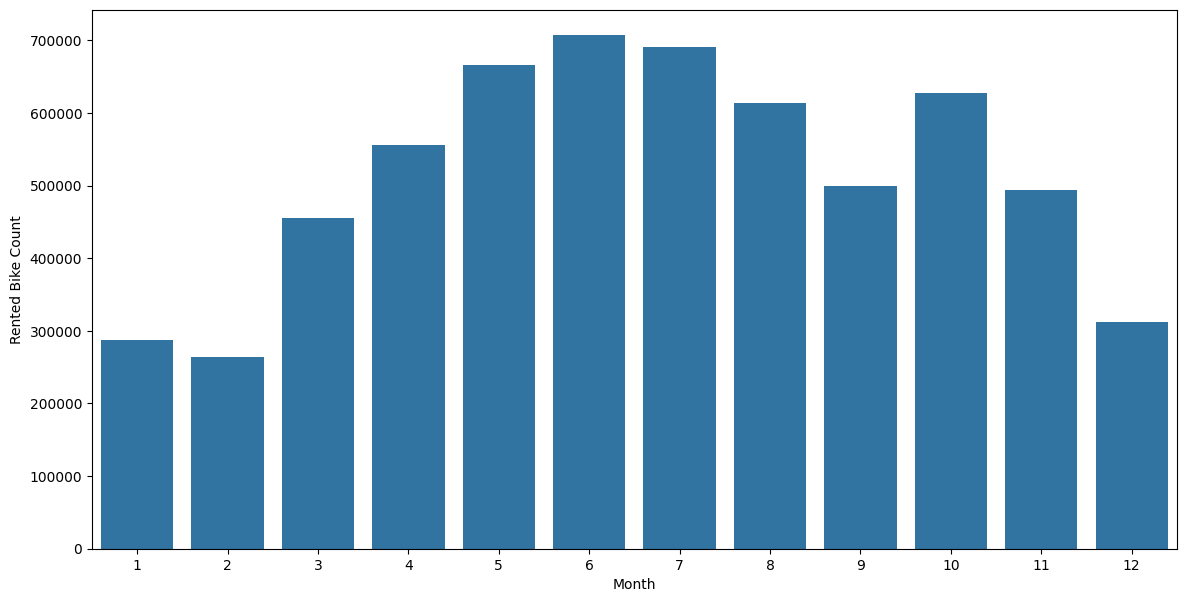

In [ ]:
plt.figure(figsize=(14,7))
Month = df.groupby('Month').sum().reset_index()
sns.barplot(x='Month', y= 'Rented Bike Count',data=Month)


<Axes: xlabel='Day', ylabel='Rented Bike Count'>

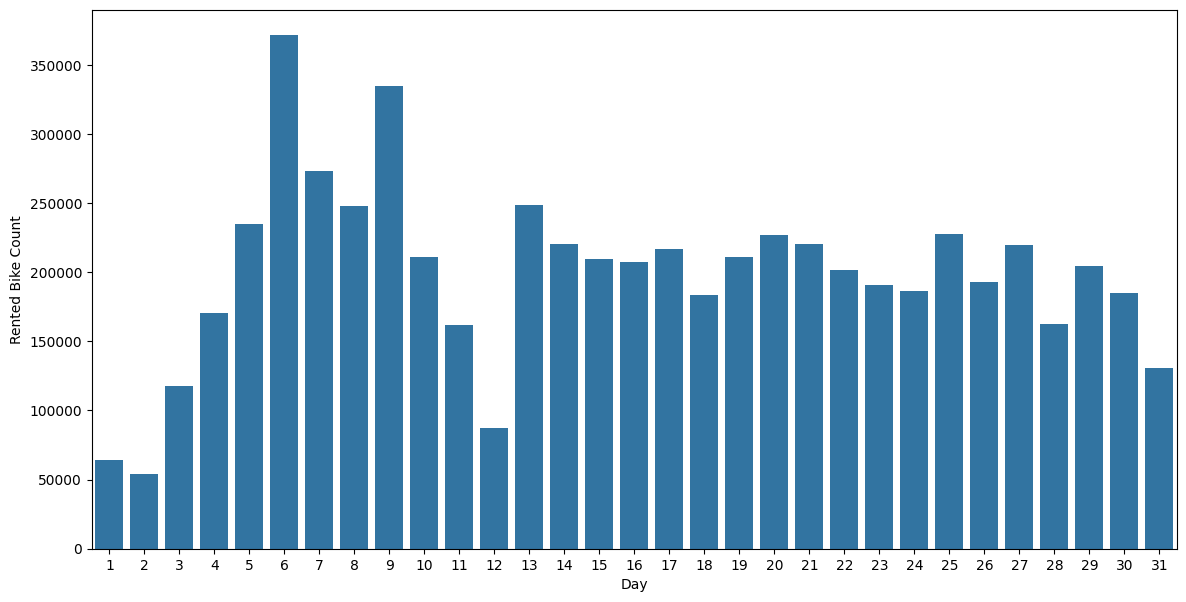

In [ ]:
plt.figure(figsize=(14,7))
Day = df.groupby('Day').sum().reset_index()
sns.barplot(x='Day', y= 'Rented Bike Count',data=Day)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

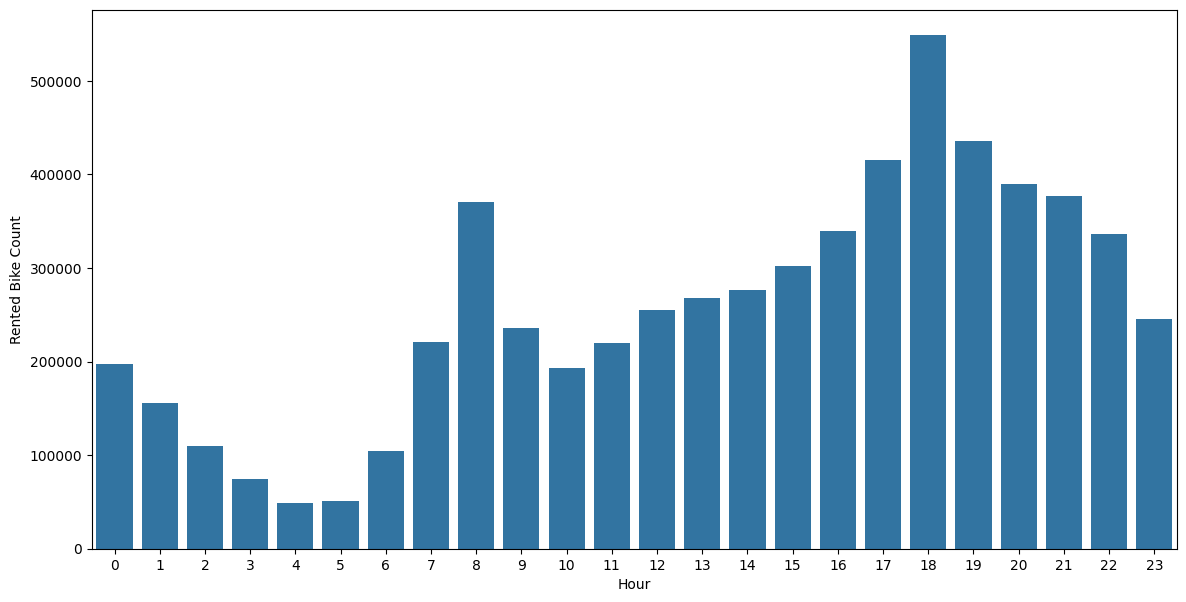

In [ ]:
plt.figure(figsize=(14,7))
Hours = df.groupby('Hour').sum().reset_index()
sns.barplot(x='Hour', y= 'Rented Bike Count',data=Hours)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

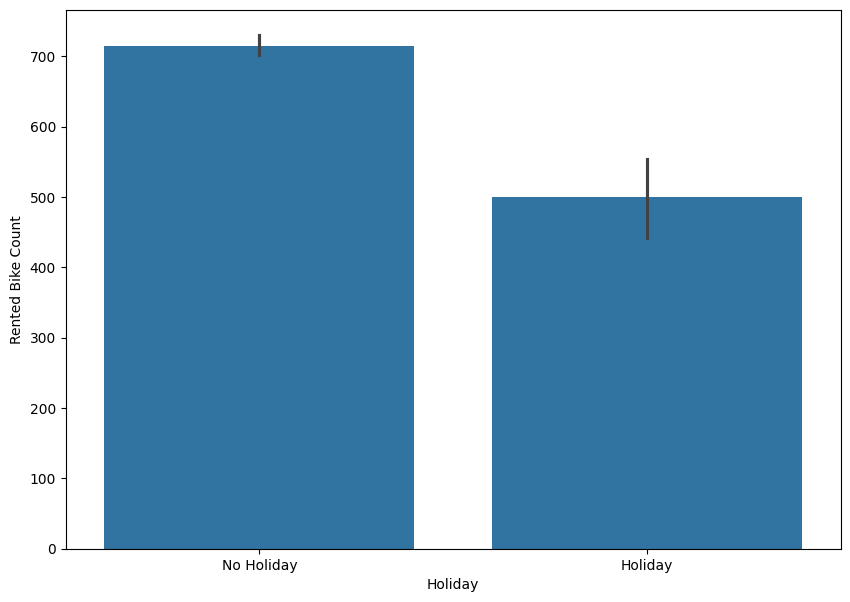

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Holiday', y= 'Rented Bike Count',data=df)

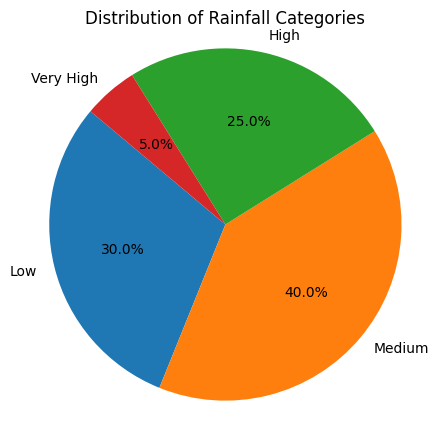

In [ ]:
rainfall_categories = ["Low", "Medium", "High", "Very High"]
rainfall_counts = [30, 40, 25, 5]
plt.figure(figsize=(5, 5))
plt.pie(rainfall_counts, labels=rainfall_categories, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Rainfall Categories")
plt.axis('equal')
plt.show()

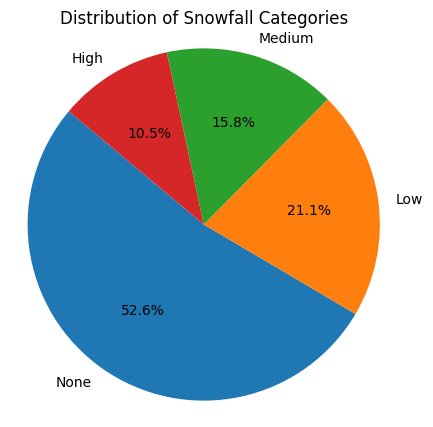

In [ ]:
snowfall_categories = ["None", "Low", "Medium", "High"]
snowfall_counts = [50, 20, 15, 10]
plt.figure(figsize=(5, 5))
plt.pie(snowfall_counts, labels=snowfall_categories, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Snowfall Categories")
plt.axis('equal')
plt.show()

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

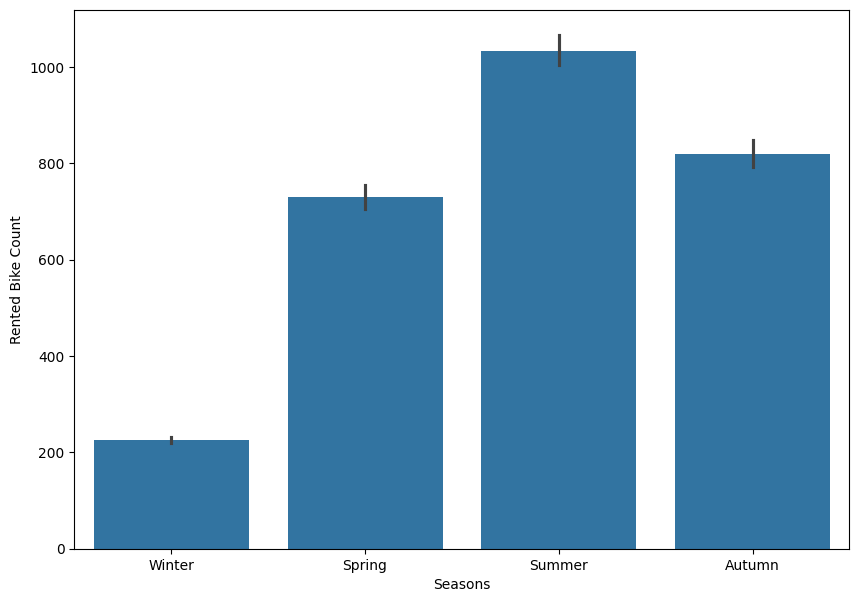

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Seasons', y= 'Rented Bike Count',data=df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

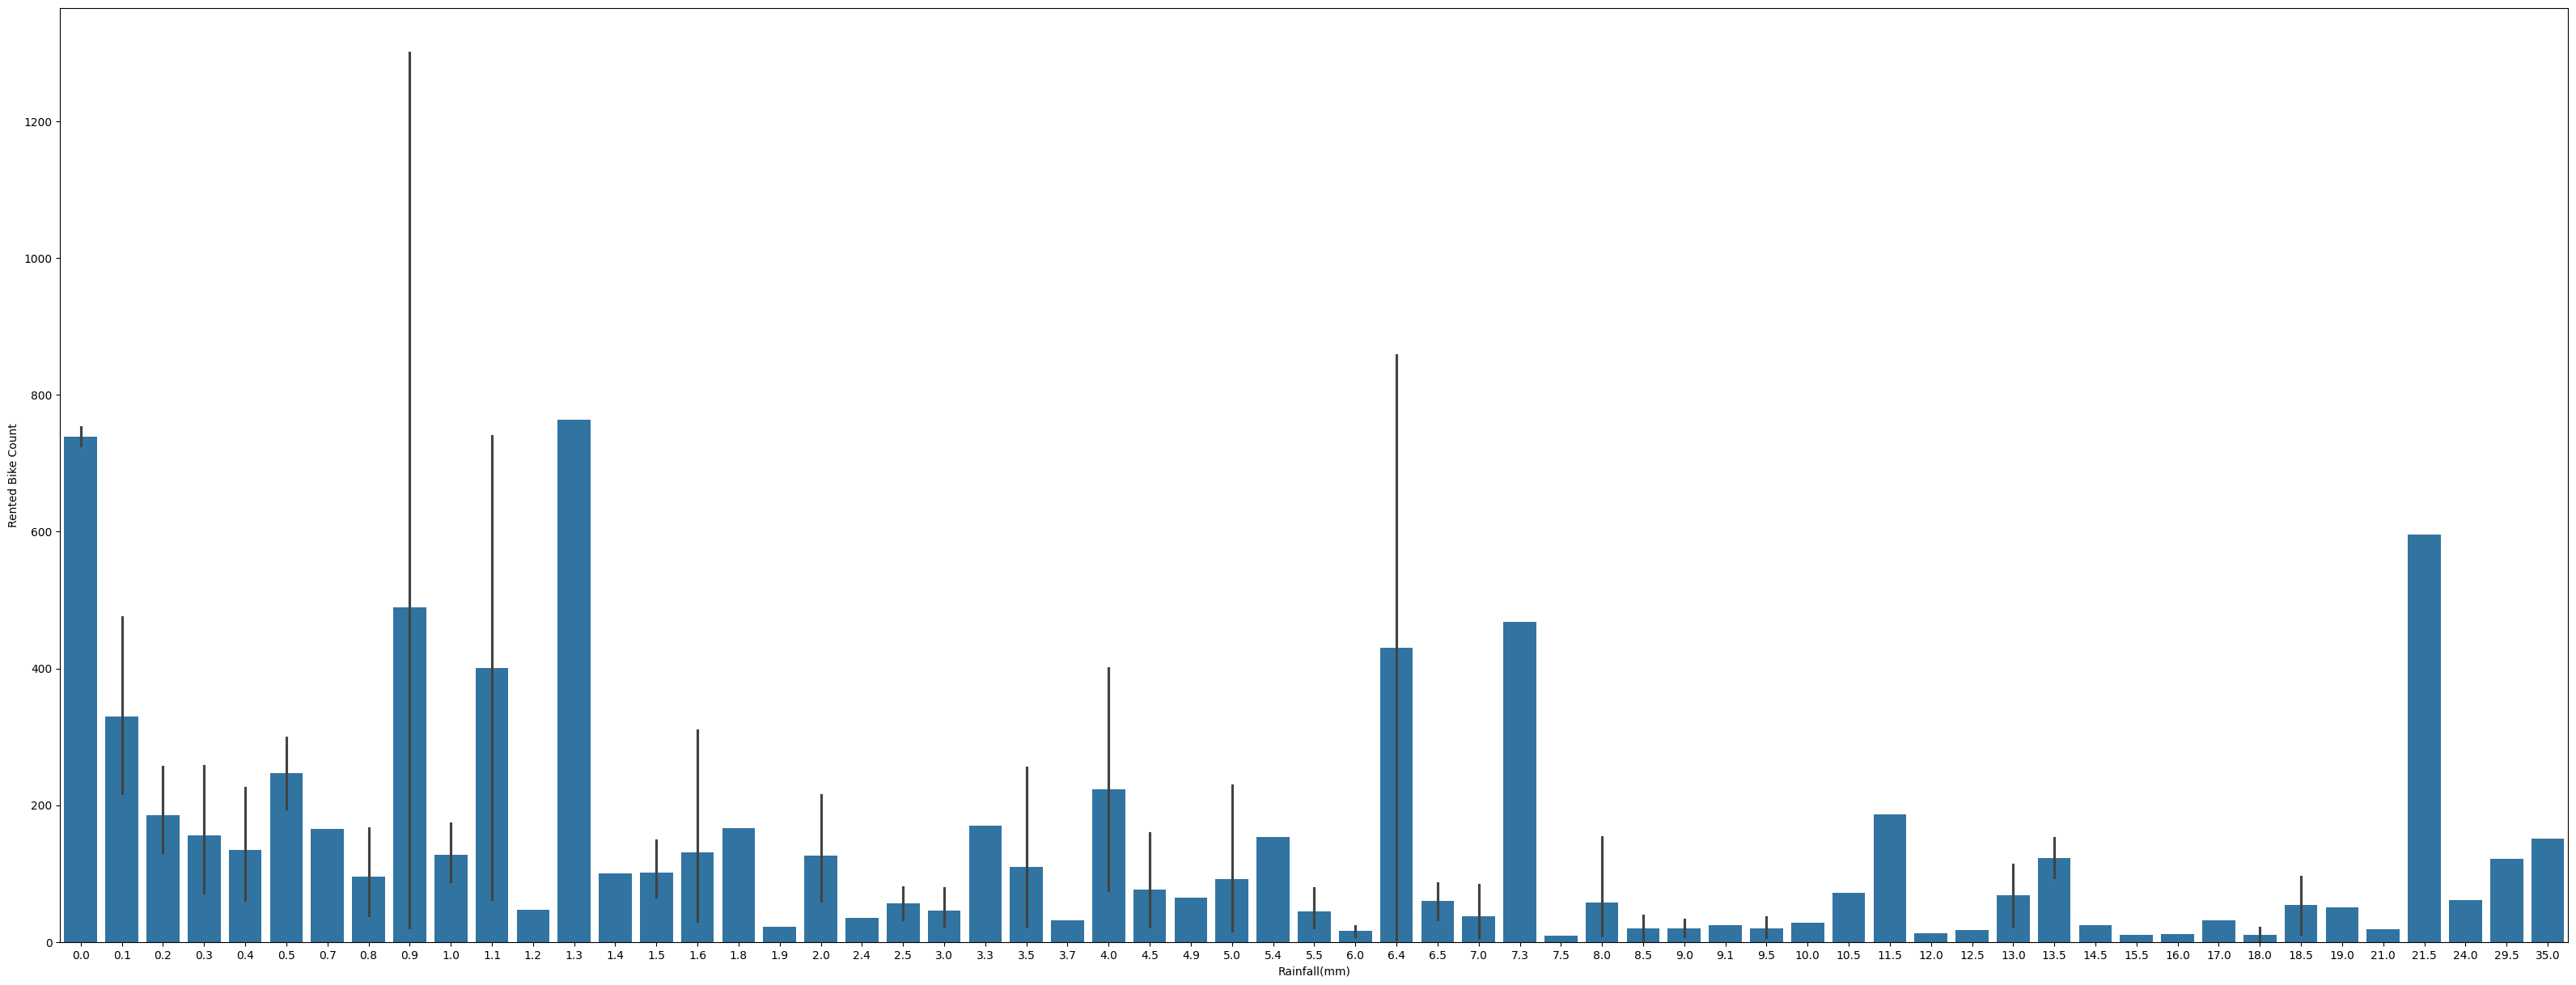

In [ ]:
plt.figure(figsize=(40,15))
sns.barplot(x='Rainfall(mm)', y= 'Rented Bike Count',data=df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

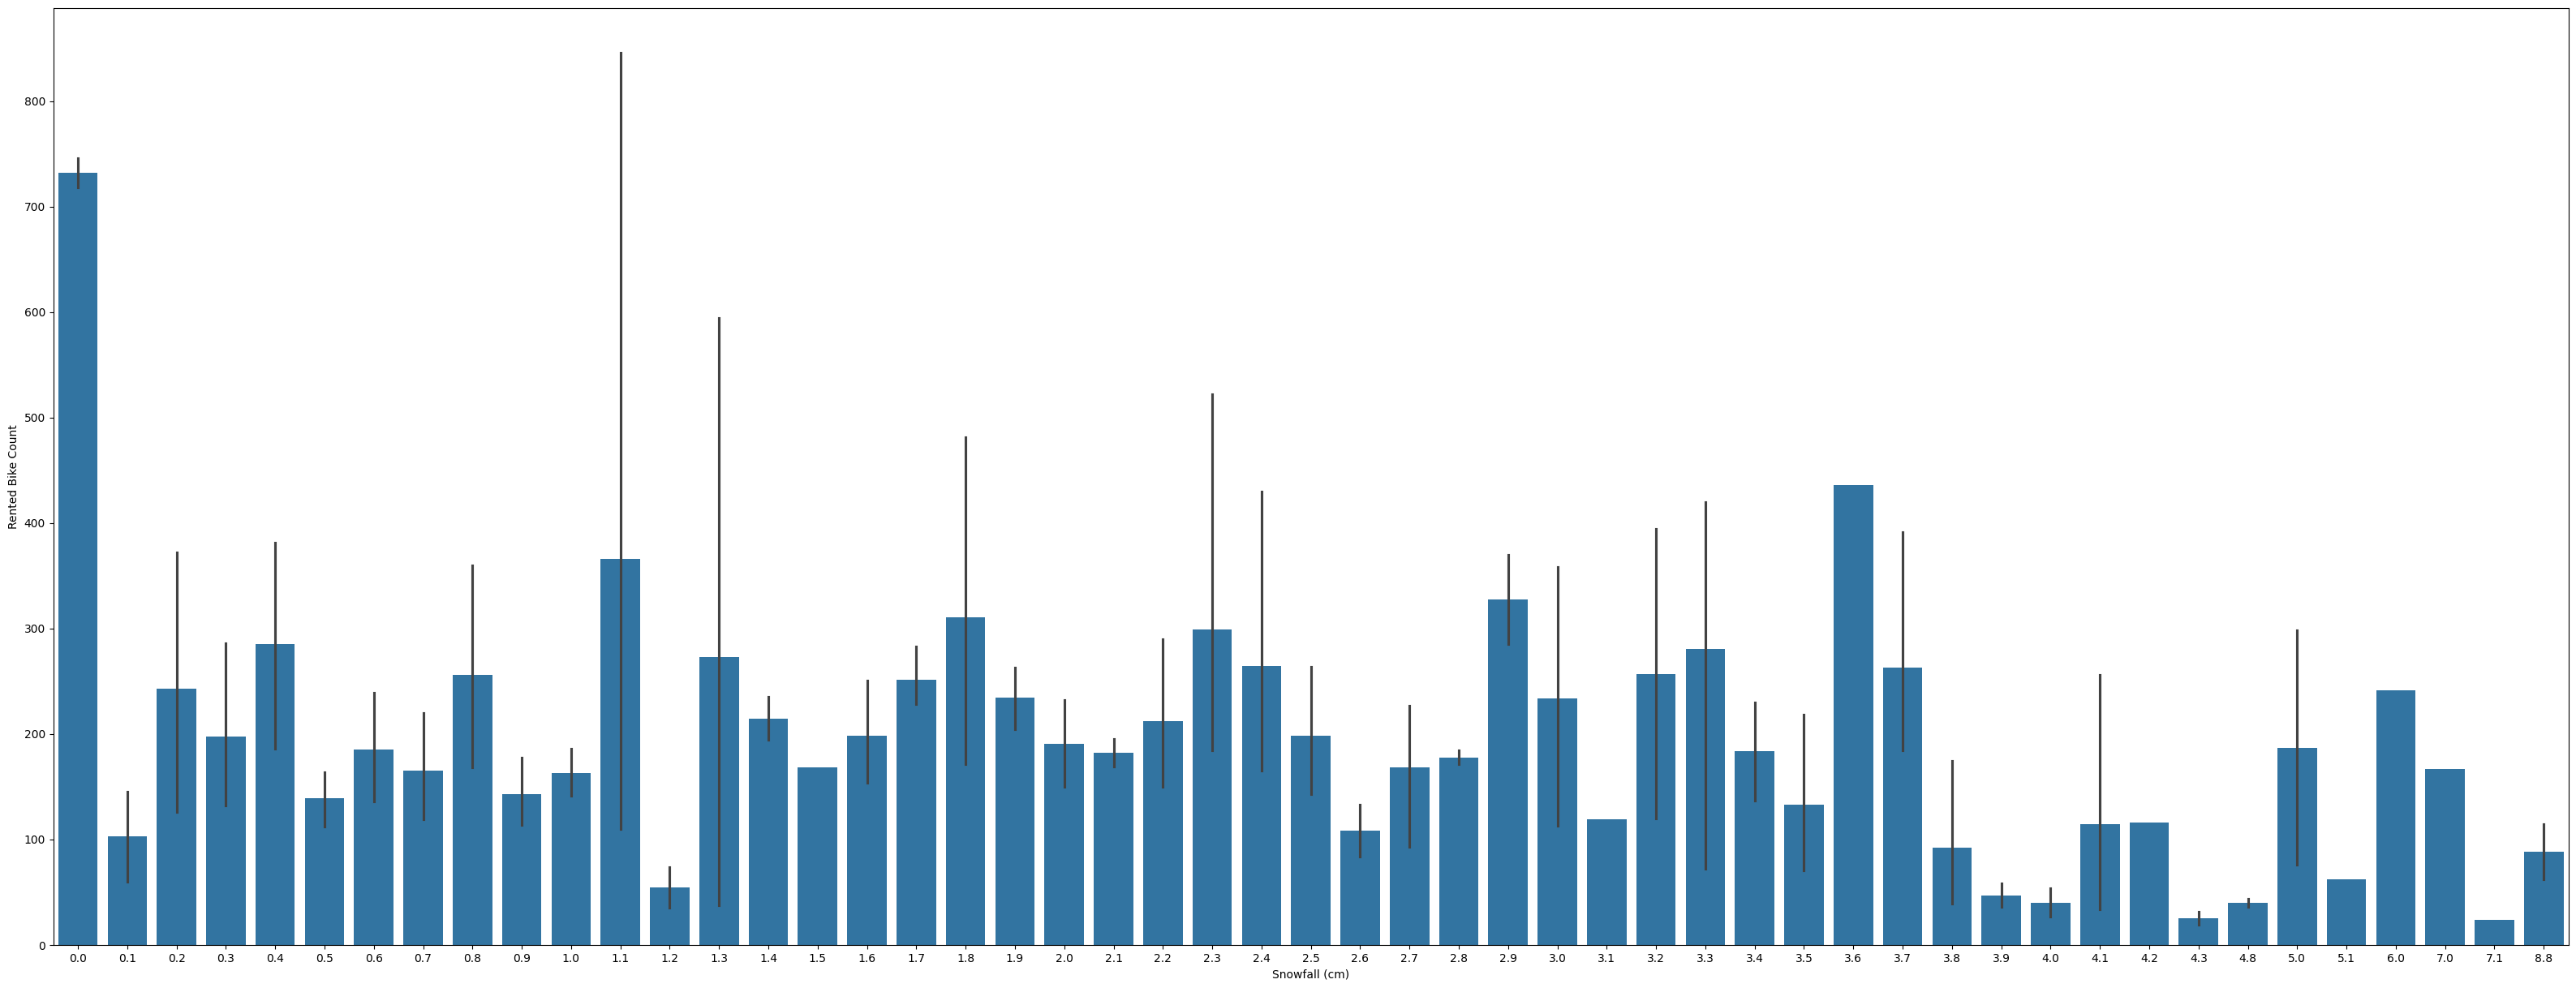

In [ ]:
plt.figure(figsize=(40,15))
sns.barplot(x='Snowfall (cm)', y= 'Rented Bike Count',data=df)

<Figure size 4000x700 with 0 Axes>

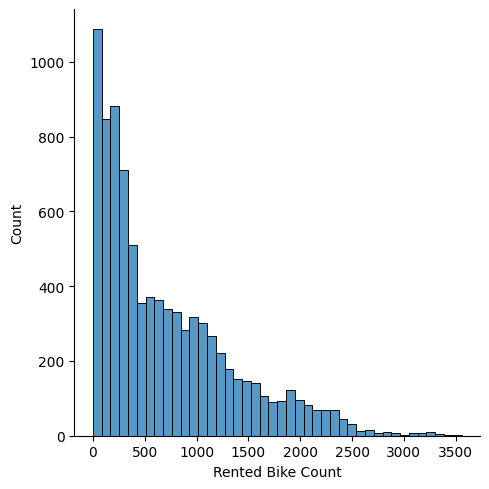

In [ ]:
plt.figure(figsize = (40,7))
sns.displot(df['Rented Bike Count'])

<Figure size 4000x700 with 0 Axes>

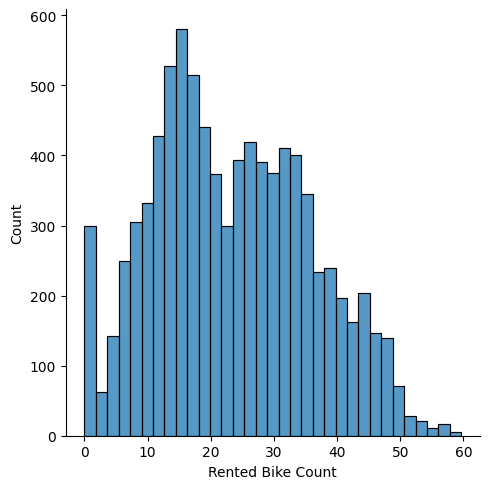

In [ ]:
plt.figure(figsize = (40,7))
sns.displot(np.sqrt(df['Rented Bike Count']))

## Displot

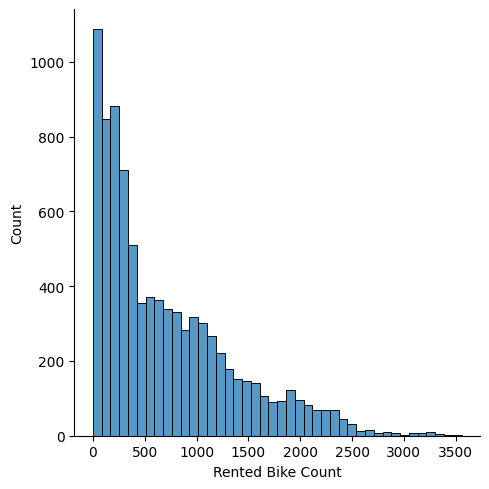

In [ ]:
# Chart visualization code
sns.displot(df["Rented Bike Count"])

## Violin plot

<ipython-input-32-52b8f6d4b5ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Dew point temperature(°C)"], palette="Set2")


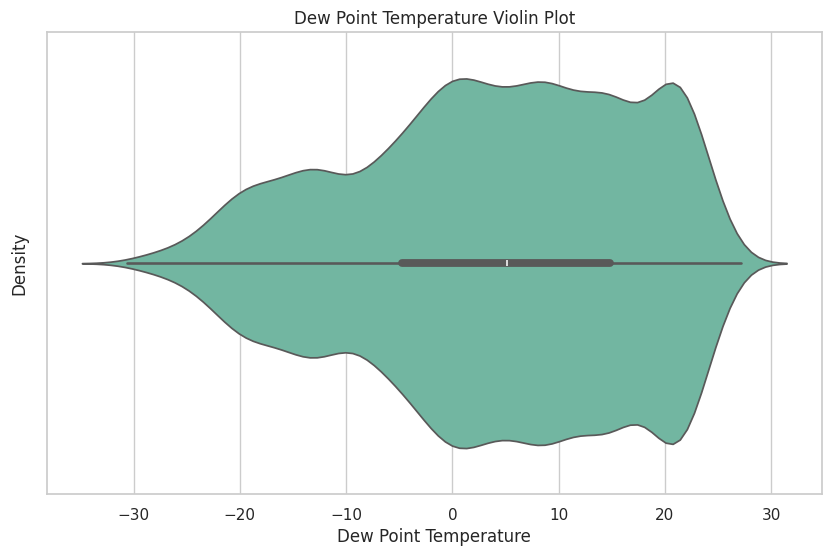

In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["Dew point temperature(°C)"], palette="Set2")
plt.title("Dew Point Temperature Violin Plot")
plt.xlabel("Dew Point Temperature")
plt.ylabel("Density")
plt.show()

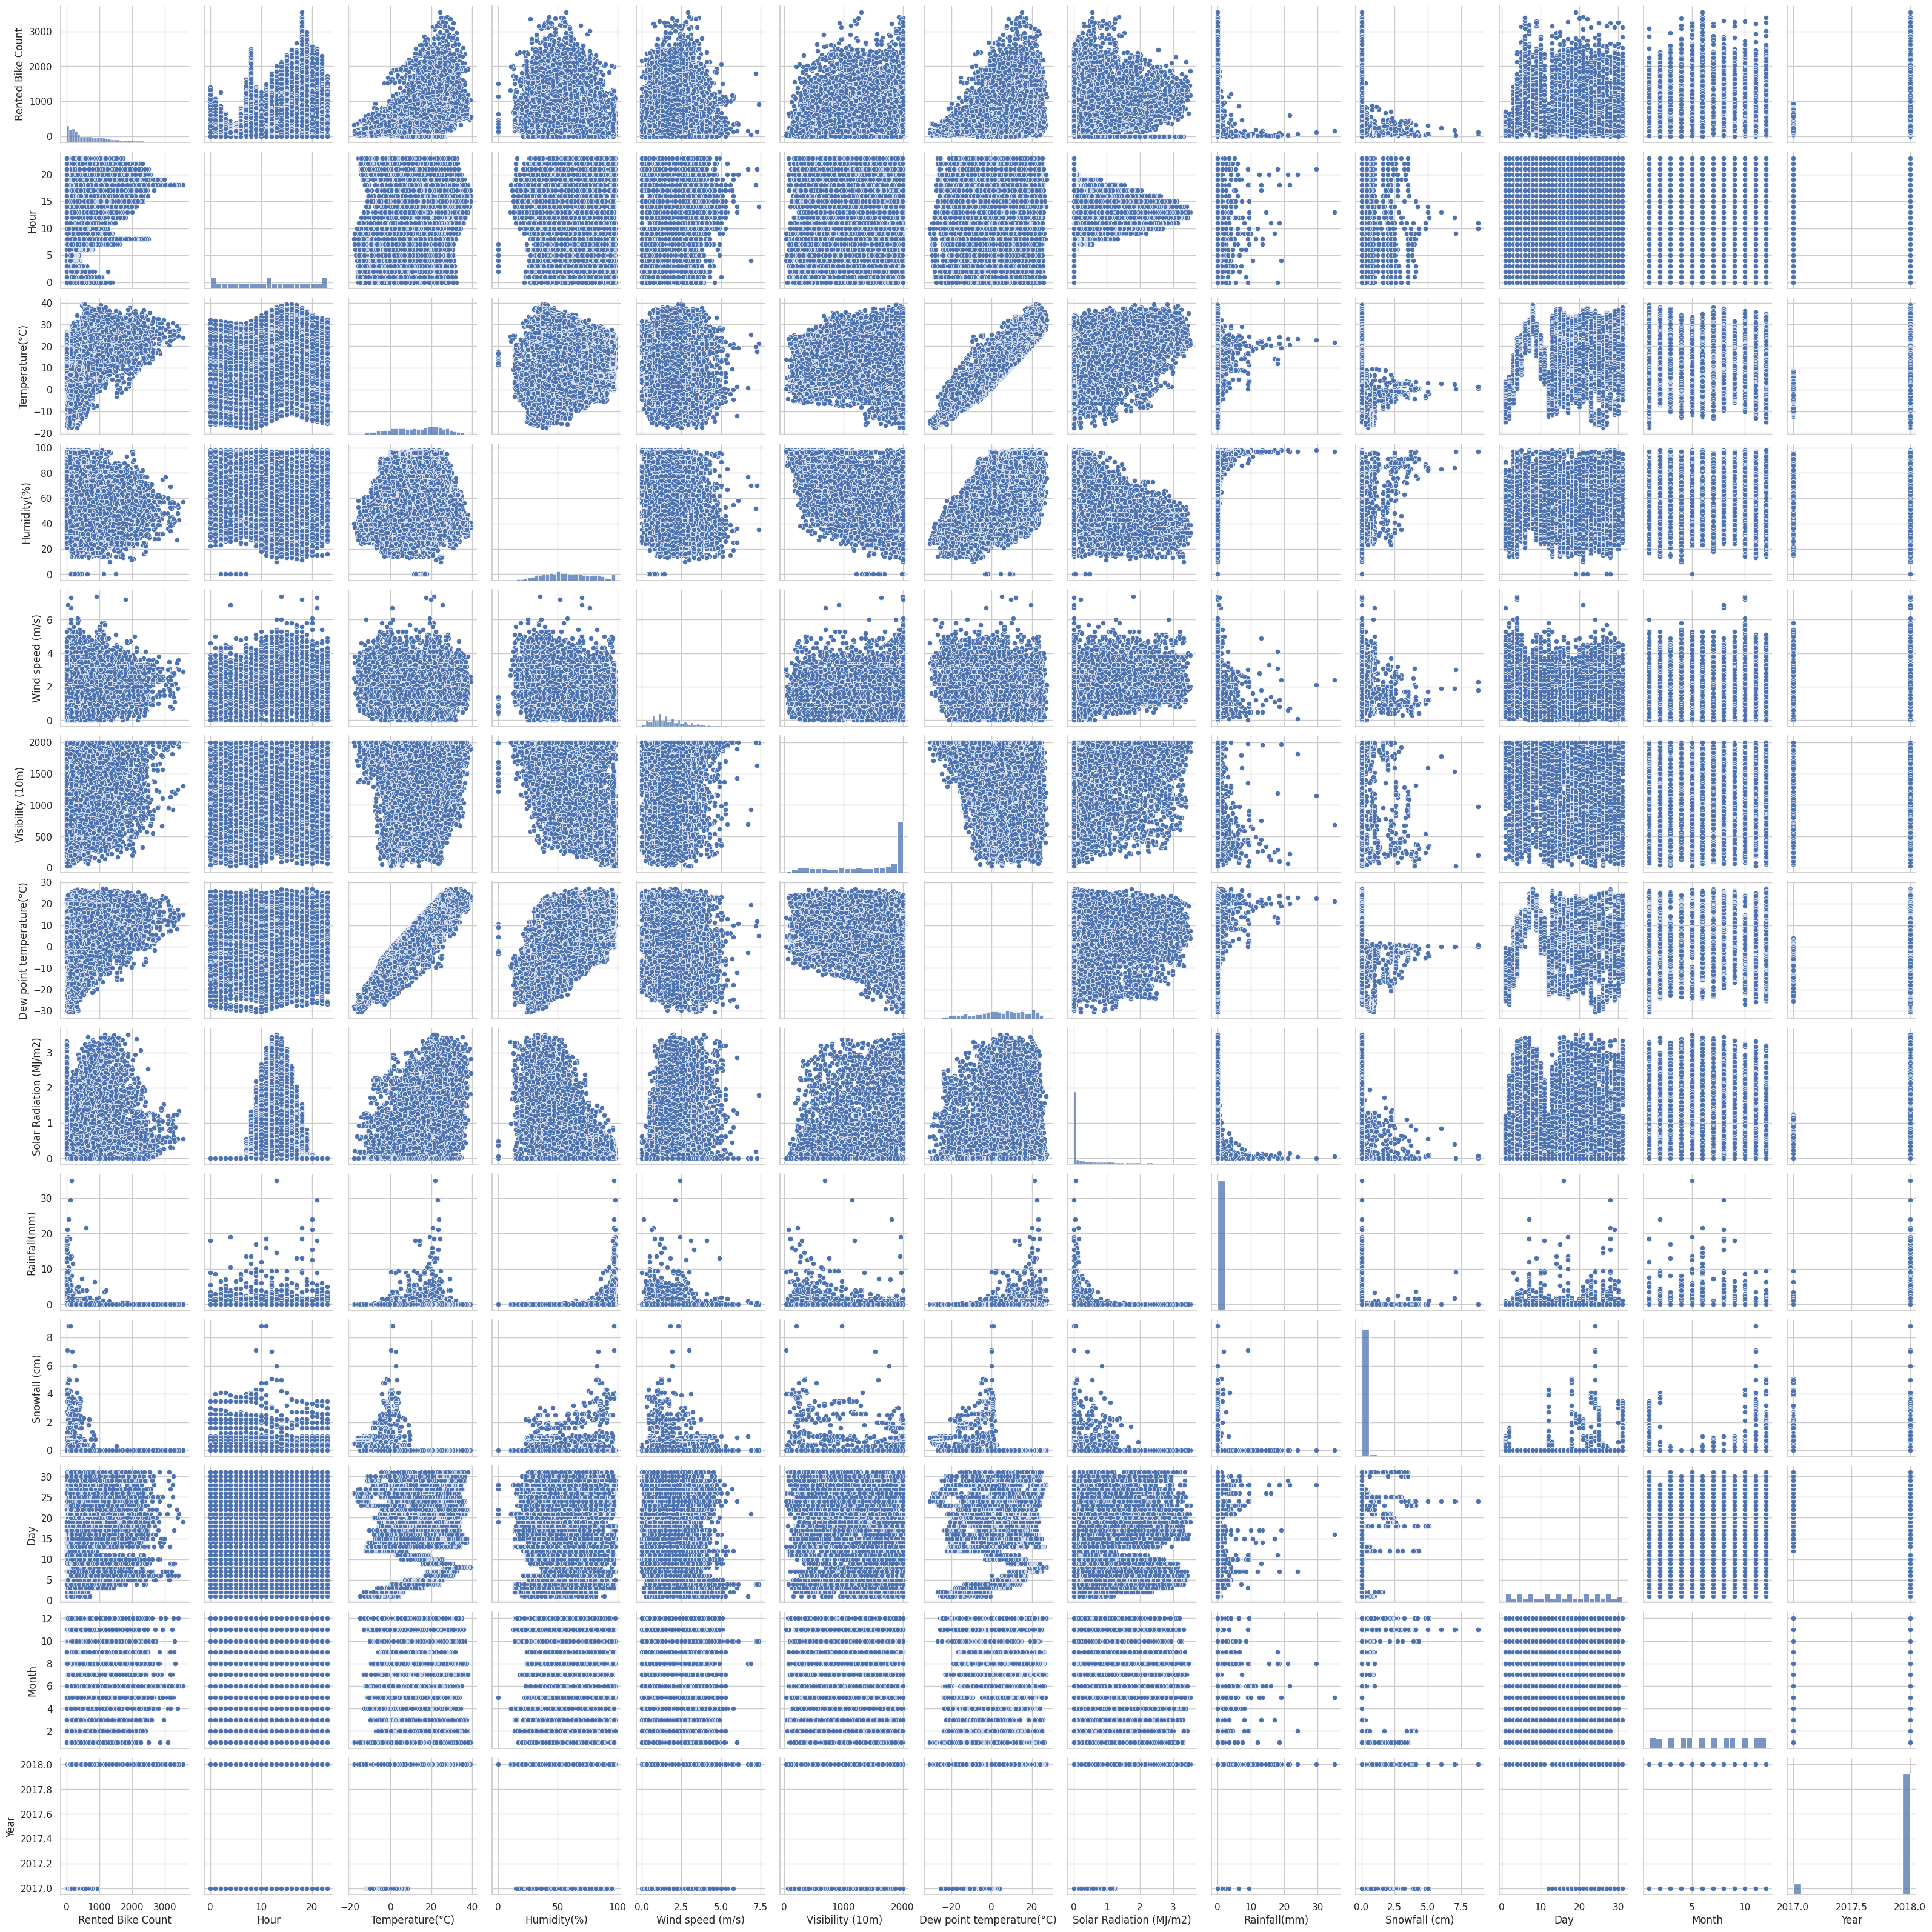

In [ ]:
#visualize the numeric data
sns.pairplot(df)

## Checking skewnees of the data

In [ ]:
df.skew(numeric_only = True).sort_values(ascending=True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## Outlair Detection

#Checking any Multicolinearity
*Multicollinearity occurs when independent variables in a regression model are highly correlated, leading to destabilized parameter estimates and reduced model interpretability.*

<Axes: >

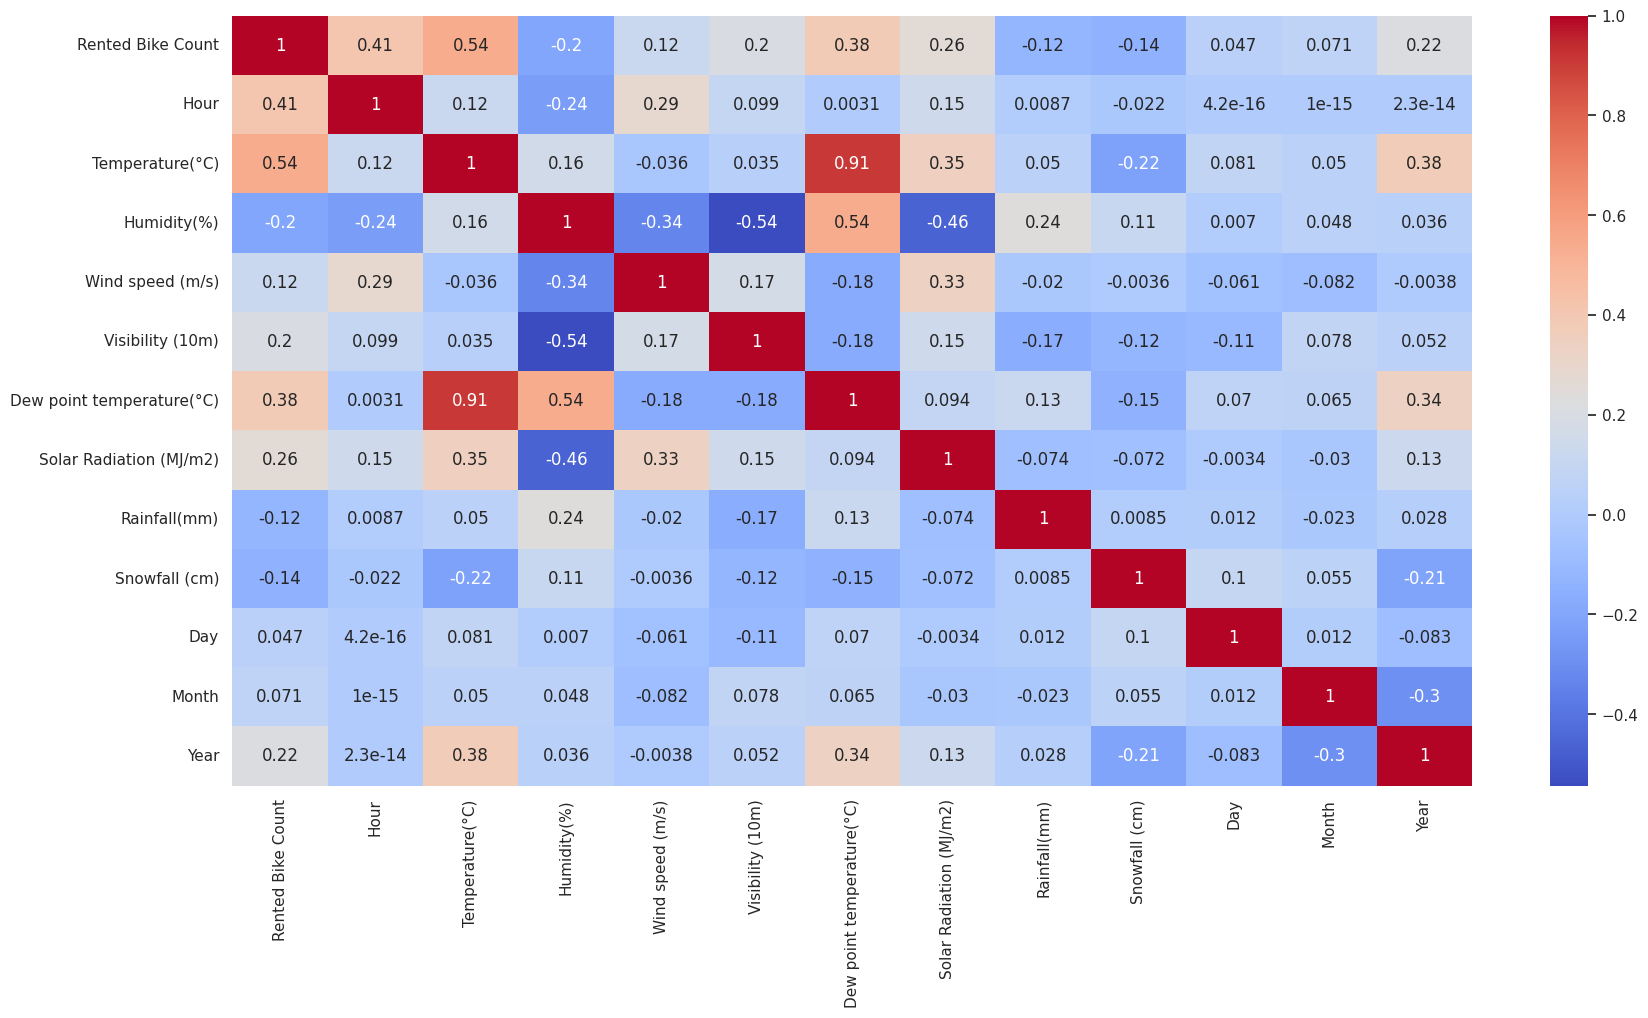

In [ ]:
#removing Multicolinearity
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "coolwarm")

## Splitting train test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(columns=['Rented Bike Count', 'Dew point temperature(°C)'])
y = df['Rented Bike Count']

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split= df(x value,y values,test_size = 0.2)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =2023)

In [ ]:
print("shape of x_train : ", x_train.shape)
print("shape of x_test : ", x_test.shape)
print("shape of y_train : ", y_train.shape)
print("shape of y_test : ", y_test.shape)

shape of x_train :  (7008, 15)
shape of x_test :  (1752, 15)
shape of y_train :  (7008,)
shape of y_test :  (1752,)


# Encoding (Using Column Transformer)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
transformer = ColumnTransformer(transformers= [
    ('tnf1', OneHotEncoder(sparse =False, drop = 'first'),["Seasons","Holiday","Functioning Day","Weekday"])], remainder='passthrough')

In [ ]:
x_train_transform = transformer.fit_transform(x_train)
x_test_transform = transformer.fit_transform(x_test)
print(x_train_transform.shape,x_test_transform.shape)

(7008, 22) (1752, 22)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train_transform)
x_test = scaler.fit_transform(x_test_transform)

In [ ]:
#scaled trainning data
x_train

array([[ 1.74132735, -0.58152447, -0.57866842, ..., -1.32928272,
         1.58736786,  0.30459857],
       [-0.57427456,  1.71961809, -0.57866842, ..., -1.10164234,
         1.58736786,  0.30459857],
       [-0.57427456, -0.58152447, -0.57866842, ...,  0.71948067,
         1.00873202,  0.30459857],
       ...,
       [ 1.74132735, -0.58152447, -0.57866842, ...,  1.06094123,
        -1.01649341,  0.30459857],
       [-0.57427456,  1.71961809, -0.57866842, ...,  0.94712104,
         0.14077827,  0.30459857],
       [-0.57427456,  1.71961809, -0.57866842, ...,  1.06094123,
        -0.14853965,  0.30459857]])

In [ ]:
#scaled testing data
x_test

array([[ 1.65156277, -0.5764715 , -0.54569018, ..., -1.23218331,
         1.00309447,  0.3048782 ],
       [-0.60548713,  1.73469113, -0.54569018, ...,  0.91811384,
         0.12409071,  0.3048782 ],
       [-0.60548713, -0.5764715 , -0.54569018, ..., -0.77948918,
         0.12409071,  0.3048782 ],
       ...,
       [-0.60548713,  1.73469113, -0.54569018, ...,  0.8049403 ,
         0.12409071,  0.3048782 ],
       [ 1.65156277, -0.5764715 , -0.54569018, ...,  0.1258991 ,
        -0.75491304,  0.3048782 ],
       [-0.60548713,  1.73469113, -0.54569018, ...,  1.03128737,
         0.41709196,  0.3048782 ]])

# Model Deployment

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
y_predict

array([ 172.47785022,  991.94965899, 1427.50698527, ..., 1567.41073028,
        508.34309287,  810.27605453])

## Evaluatating the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_predict)
R2_Score = r2_score(y_test,y_predict)

In [ ]:
print("MSE  : ",round(MSE,3))
print("RMSE : ",round(RMSE,3))
print("MAE  : ",round(MAE,3))
print("R2   : ",round(R2_Score,3))

MSE  :  189160.789
RMSE :  434.926
MAE  :  331.679
R2   :  0.537


*Creating a function to calculate the parameters for different models*


In [ ]:
def get_metrics(y_test, y_predict, model_name):
    MSE = mean_squared_error(y_test,y_predict)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_predict)
    R2_Score = r2_score(y_test,y_predict)

    print(f"Model Name : {model_name},\n MSE : {round(MSE,3)},\n RMSE :{round(RMSE,3)},\n MAE :{round(MAE,3)},\n R2 Score : {round(R2_Score,3)}\n")



In [ ]:
get_metrics(y_test, y_predict, "Liner Regression")

Model Name : Liner Regression,
 MSE : 189160.789,
 RMSE :434.926,
 MAE :331.679,
 R2 Score : 0.537



## Training Multiple model

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
rig = Ridge().fit(x_train, y_train)
y_pred_rig = rig.predict(x_test)

lar = Lasso().fit(x_train, y_train)
y_pred_lar = lar.predict(x_test)

poly = PolynomialFeatures(2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

poly_r = LinearRegression().fit(x_train_poly, y_train)
y_pred_poly = poly_r.predict(x_test_poly)

svr = SVR().fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

knnr = KNeighborsRegressor().fit(x_train, y_train)
y_pred_knn = knnr.predict(x_test)

dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

rfr = RandomForestRegressor().fit(x_train, y_train) #use bagging (ensmble)
y_pred_rfr = rfr.predict(x_test)

xgbr = XGBRegressor().fit(x_train, y_train) #use boosting(ensmble)
y_pred_rxgbr = xgbr.predict(x_test)

In [ ]:
get_metrics(y_test, y_pred_rig, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knn, "KNeighborsRegressor")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_rxgbr, "XGBRegressor")


Model Name : Ridge,
 MSE : 189159.339,
 RMSE :434.925,
 MAE :331.673,
 R2 Score : 0.537

Model Name : Lasso,
 MSE : 189078.61,
 RMSE :434.832,
 MAE :331.294,
 R2 Score : 0.537

Model Name : PolynomialFeatures,
 MSE : 2.1842836119966079e+24,
 RMSE :1477932208187.036,
 MAE :920807389318.93,
 R2 Score : -5.351277146445039e+18

Model Name : SVR,
 MSE : 318049.707,
 RMSE :563.959,
 MAE :385.68,
 R2 Score : 0.221

Model Name : KNeighborsRegressor,
 MSE : 102858.16,
 RMSE :320.715,
 MAE :211.54,
 R2 Score : 0.748

Model Name : DecisionTreeRegressor,
 MSE : 95892.246,
 RMSE :309.665,
 MAE :182.733,
 R2 Score : 0.765

Model Name : RandomForestRegressor,
 MSE : 46540.606,
 RMSE :215.733,
 MAE :137.016,
 R2 Score : 0.886

Model Name : XGBRegressor,
 MSE : 42475.06,
 RMSE :206.095,
 MAE :134.57,
 R2 Score : 0.896



# Vizualization of Model Predictions

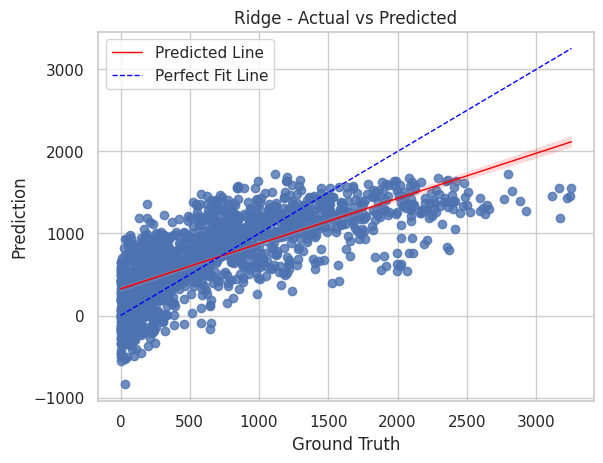

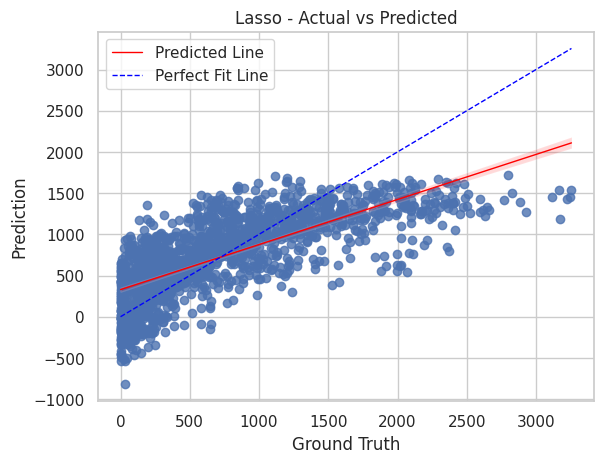

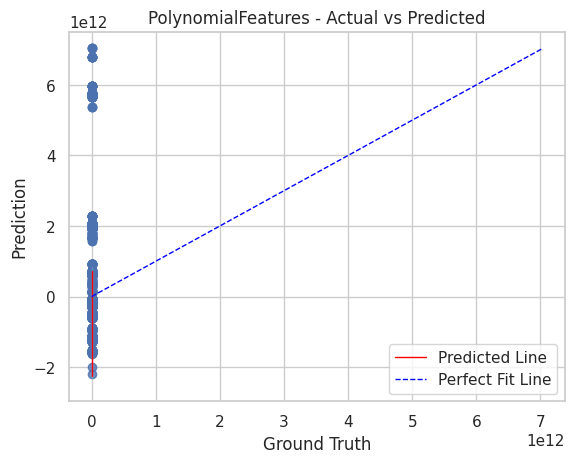

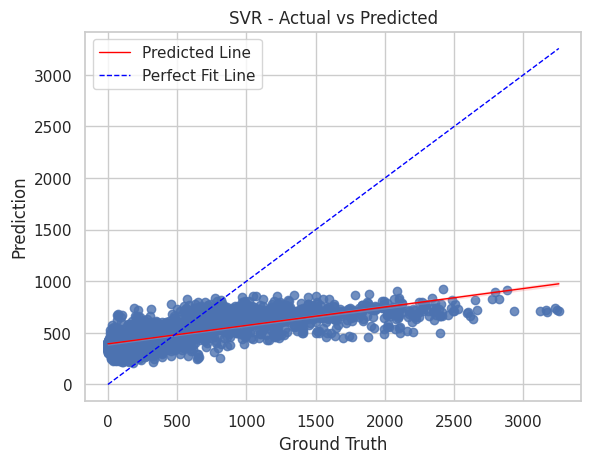

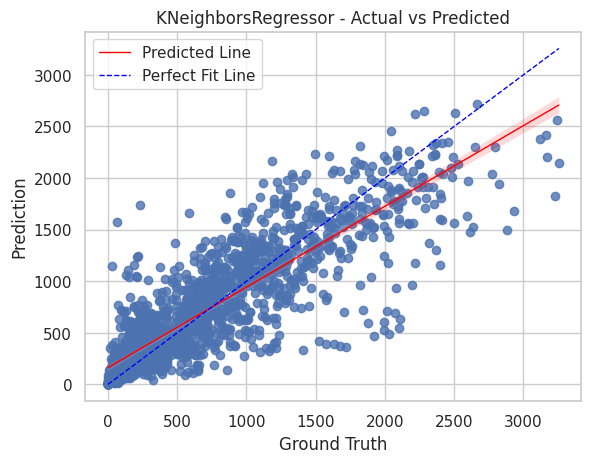

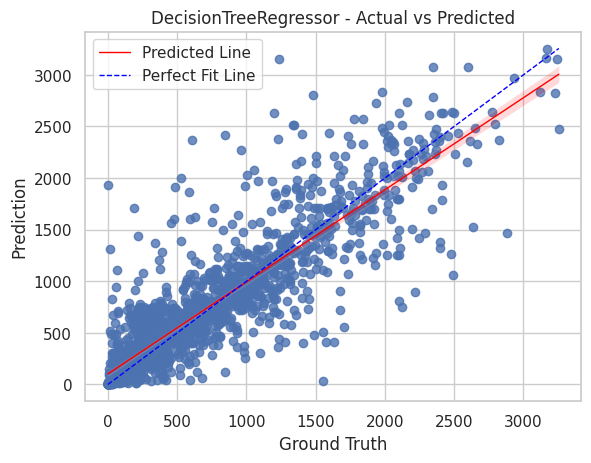

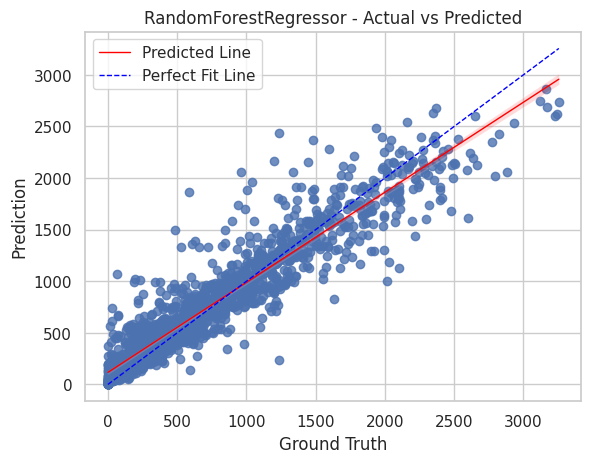

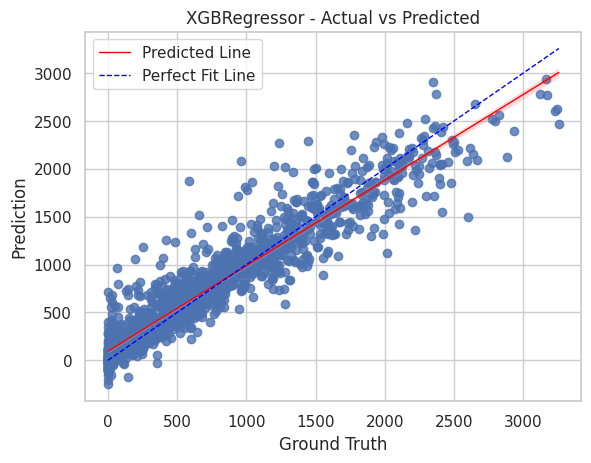

In [ ]:
def visualize_model(y_test, y_predict, model_name):

    # Create a Seaborn regplot
    sns.regplot(x=y_test, y=y_predict, line_kws={"color":"red","linewidth":1, "label": "Predicted Line"})

    # Plotting the perfect fit line (slope = 1)
    max_val = max(np.max(y_test), np.max(y_predict))
    plt.plot([0, max_val], [0, max_val], color='blue', linestyle='--', linewidth=1, label='Perfect Fit Line')

    plt.title(f"{model_name} - Actual vs Predicted")
    plt.xlabel('Ground Truth')
    plt.ylabel('Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()



models = [
    (y_pred_rig, "Ridge"),
    (y_pred_lar, "Lasso"),
    (y_pred_poly, "PolynomialFeatures"),
    (y_pred_svr, "SVR"),
    (y_pred_knn, "KNeighborsRegressor"),
    (y_pred_dtr, "DecisionTreeRegressor"),
    (y_pred_rfr, "RandomForestRegressor"),
    (y_pred_rxgbr, "XGBRegressor")
]

for y_pred, model_name in models:
    visualize_model(y_test, y_pred, model_name)


#  Hyperparameter Tuning for Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 100, stop = 1000, num = 10)]

In [ ]:
# number of features to consider at every split
max_features =['auto', 'sqrt']

In [ ]:
#maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10,120, num = 12)]

In [ ]:
#maximum number of samples requried to split a node
min_samples_split = [2,5,10]

In [ ]:
#maximum number of samples requried at each leaf node
min_samples_leaf = [1,2,4]

In [ ]:
#method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
#create the random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

In [ ]:
import time
start_time = time.time()

rf = RandomForestRegressor()
#Random search of parameter using 3 fold cross validation
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs= -1)

# fit the random search model
rf_random.fit(x_train, y_train)
rf_pred_rf_random = rf_random.predict(x_test)

print("Time taken:", time.time() - start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Time taken: 1646.9074993133545


In [ ]:
get_metrics(y_test,rf_pred_rf_random,"Random Forest Regressor Fine Tunning")

Model Name : Random Forest Regressor Fine Tunning,
 MSE : 45440.472,
 RMSE :213.168,
 MAE :135.518,
 R2 Score : 0.889



In [ ]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [ ]:
rf_tuned = RandomForestRegressor(n_estimators = 700,
               max_features ='auto',
               max_depth =100,
               min_samples_split = 2,
               min_samples_leaf = 1,
               bootstrap = True
)

rf_tuned.fit(x_train,y_train)
y_pred_rf_tuned =rf_tuned.predict(x_test)

get_metrics(y_test, y_pred_rf_tuned,"Random Forest Regressor With Best Parameters" )

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Model Name : Random Forest Regressor With Best Parameters,
 MSE : 45405.861,
 RMSE :213.087,
 MAE :135.744,
 R2 Score : 0.889



## Hyperparameter Tunning of XGBoost Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time
start_time = time.time()

params = {
    'n_estimators': [100, 500, 1000,1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1)
}

xgbr = XGBRegressor(seed=20)
rscv = RandomizedSearchCV(estimator=xgbr, param_distributions=params, scoring='neg_mean_squared_error', n_iter=25, cv=5, verbose=1, random_state=20)


rscv.fit(x_train, y_train)

y_pred_xgb_random = rscv.predict(x_test)

print("Time taken:", time.time() - start_time)

get_metrics(y_test, y_pred_xgb_random, "XGB Regressor With Best Parameters")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Time taken: 135.68099403381348
Model Name : XGB Regressor With Best Parameters,
 MSE : 39378.135,
 RMSE :198.439,
 MAE :126.6,
 R2 Score : 0.904



In [ ]:
rscv.best_params_

{'subsample': 0.8999999999999999,
 'n_estimators': 1000,
 'min_child_weight': 2,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.5,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.7}

In [ ]:
rscv = XGBRegressor(n_estimators = 10000,
               subsample =0.666,
              min_child_weight = 0.95,
               max_depth =9,
               learning_rate = 0.02,
               gamma =0.5,
               colsample_bytree = 0.7,
               colsample_bylevel = 0.6
)

rscv.fit(x_train,y_train)
y_pred_rscv =rscv.predict(x_test)

get_metrics(y_test, y_pred_rscv,"XGBRegressor With Best Parameters" )

Model Name : XGBRegressor With Best Parameters,
 MSE : 36070.189,
 RMSE :189.922,
 MAE :120.848,
 R2 Score : 0.912



## 1. Which Evaluation metrics did you consider for a positive business impact and why?
We have chosen appropriate evaluation metrics (MSE, RMSE, MAE, and R2) to assess the positive business impact of our XGBRegressor (Tuned) model. These metrics collectively indicate that our model is making accurate predictions and capturing a substantial portion of the underlying data patterns, which can lead to better decision-making and positive business outcomes.

## 2. Which ML model did you choose from the above created models as your final prediction model and why?
**1.High Accuracy (R2 Score):** The **XGBRegressor** achieved an R2 score of **0.912** . An R2 score of 1.0 represents a perfect fit to the data, so a score of 0.912 is **quite strong**. This indicates that the model is capturing a significant portion of the variance in the target variable and providing accurate predictions.

**2.Robustness:** XGBRegressor is known for its **robustness and resistance to overfitting**. The boosting technique, which sequentially builds trees and corrects errors made by previous models, **enhances generalization and stability**, making it suitable for various datasets.

**3.Feature Importance:** XGBRegressor provides **feature importances, offering insights** into which features have the most significant impact on predictions. This capability aids in feature selection and understanding the underlying dynamics of the data.

**4.Versatility:** XGBRegressor is **versatile** and applicable to both regression and classification tasks. It can handle various data types and feature sets effectively, adapting well to different problem domains.

**5.Fine-Tuning:** Performing hyperparameter tuning on the XGBRegressor demonstrates a commitment to optimizing model performance. This meticulous tuning process helps achieve high accuracy by finding the optimal combination of parameters such as learning rate, tree depth, and subsampling.

**6.Interpretability:** While XGBRegressor models are less interpretable compared to simpler models like linear regression, they still provide insights through feature importance analysis. This analysis helps stakeholders understand which features drive predictions, supporting informed decision-making.



##3.Explain the model which you have used and the feature importance using any model explainability tool?

*We trained our XGBRegressor model using our dataset. The model, stored in the variable xgbr, was evaluated for accuracy using appropriate metrics. By accessing the feature_importances_ attribute, we obtained an array of scores indicating the importance of each feature in our dataset. This analysis helps in understanding the relative influence of each feature on the model's predictions.*

*Lastly, we performed cross-validation and hyperparameter tuning to ensure robustness and optimize the model's performance. This iterative process involved systematically adjusting model parameters based on validation results, enhancing both accuracy and generalization capabilities.*

## Conclusion
In conclusion, the introduction of rental bikes in urban cities has transformed transportation and provided a sustainable, convenient, and eco-friendly mobility solution. Ensuring a stable supply of rental bikes is vital for the success of these systems. By combining demand forecasting, optimal placement, inventory management, real-time monitoring, dynamic pricing, user engagement, and technology, cities can create efficient and user-friendly bike-sharing systems.

These systems not only reduce waiting times and enhance mobility comfort but also contribute to reducing traffic congestion and environmental impact. The continuous improvement of bike-sharing systems through data-driven strategies and user feedback plays a crucial role in making urban transportation more efficient and sustainable. As cities continue to grow, bike-sharing initiatives remain an important component of the urban mobility landscape, benefiting both residents and the environment.

### ***Thank You***